# Example p. 27

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, gamma

In [2]:
xi = 0.005
sigma = 0.05
k = 5000

x_bar_star = np.zeros(k)
s_star = np.zeros(k)
s_x_bar = np.zeros(k)
s_s_star = np.zeros(k)

In [3]:
for i in range(k):
   x = np.random.normal(size=i+1, loc=xi, scale=sigma)
   x_bar_star[i] = np.mean(x)
   s_star[i] = np.std(x)

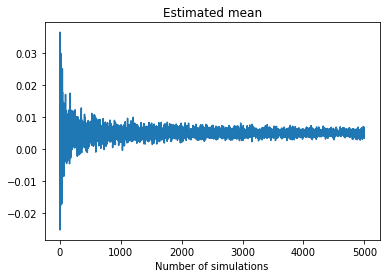

In [4]:
ymin = min(min(x_bar_star), s_star[-1])
ymax = max(max(x_bar_star), s_star[-1])

plt.plot(x_bar_star)
plt.xlabel('Number of simulations')
plt.title('Estimated mean')
plt.show()


In [5]:
print(ymin, ymax)

-0.02530521513835056 0.05037711486518474


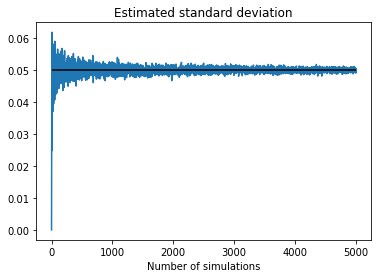

In [7]:
plt.plot(s_star, zorder=1)
# plt.ylim(ymin, ymax)
plt.xlabel('Number of simulations')
plt.title('Estimated standard deviation')
plt.hlines(y=sigma,xmin=0, xmax=k, zorder=2)
plt.show()

# Example p. 28: Percentiles

In [8]:
from scipy.stats import t, norm

xi = 0.005
sigma = 0.05
nu = 3
yps = [0.95,0.99]

q1_star = np.zeros((1000,2))
q2_star = np.zeros((1000,2))


In [9]:
for i in range(10, 10000,10):
  x1 = np.random.normal(size=i, loc=xi, scale=sigma) # normal
  x2 = xi+sigma*np.sqrt((nu-2)/nu)*t.rvs(size=i, df=nu) # t
  for j in range(2):
    q1_star[i//10, j] = sorted(x1)[np.floor(yps[j]*i).astype(np.int64)]
    q2_star[i//10, j] = sorted(x2)[np.floor(yps[j]*i).astype(np.int64)]


In [26]:
# save to file
np.savetxt("q1_star.csv", q1_star, delimiter=",")
np.savetxt("q2_star.csv", q2_star, delimiter=",")

In [ ]:
# read from file
q1_star = np.genfromtxt('q1_star.csv', delimiter=',')
q2_star = np.genfromtxt('q1_star.csv', delimiter=',')

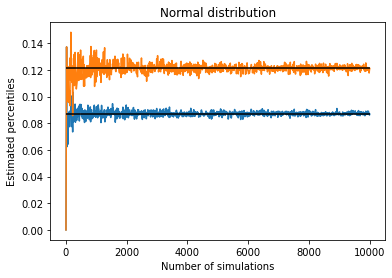

In [10]:
plt.plot(np.arange(10,10000,10), q1_star[:-1,0], zorder=1)
plt.plot(np.arange(10,10000,10), q1_star[:-1,1], zorder=1)
plt.xlabel("Number of simulations")
plt.ylabel("Estimated percentiles")
plt.title("Normal distribution")
plt.hlines(norm.ppf(yps[0], loc=xi, scale=sigma), xmin=0, xmax=10000-1, zorder=2)
plt.hlines(norm.ppf(yps[1], loc=xi, scale=sigma), xmin=0, xmax=10000-1, zorder=2)
plt.show()

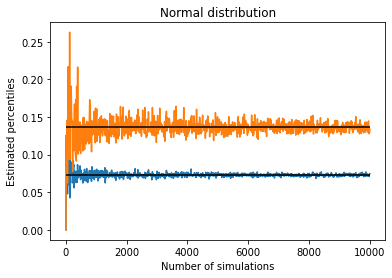

In [11]:
plt.plot(np.arange(10,10000,10), q2_star[:-1,0], zorder=1)
plt.plot(np.arange(10,10000,10), q2_star[:-1,1], zorder=1)
plt.xlabel("Number of simulations")
plt.ylabel("Estimated percentiles")
plt.title("Normal distribution")
plt.hlines(xi + sigma*np.sqrt((nu-2)/nu)*t.ppf(yps[0], df=nu), xmin=0, xmax=10000-1, zorder=2)
plt.hlines(xi + sigma*np.sqrt((nu-2)/nu)*t.ppf(yps[1], df=nu), xmin=0, xmax=10000-1, zorder=2)
plt.show()

#Example p. 29: Density estimation

In [12]:
alpha = 3
beta = 1
h = [0.05,0.2,0.3,0.5]

m = 1000
x_star = gamma.rvs(alpha, size=m, scale=beta)
s_star = np.std(x_star)
x = np.arange(0, 10, 0.01)
f_hat = np.zeros((len(h), len(x)))

In [13]:
for i in range(len(x)):
  for j in range(len(h)):
    f_hat[j][i] = sum(norm.pdf((x_star-x[i])/(h[j]*s_star)))/(m*h[j]*s_star)

In [14]:
plt.plot(x, gamma.pdf(x, alpha, scale=beta))
plt.plot(x, f_hat[0], '-')
plt.plot(x, f_hat[1], '-.')
plt.plot(x, f_hat[2], ':')
plt.plot(x, f_hat[3], '--')
plt.show()

# Example p. 38/39:

In [117]:
xi = 0.005
sigma = 0.05
rho = [-0.9,0,0.5,0.9,0.99]
alpha = 1


In [120]:
m = 100
R1_star = np.zeros((m, len(rho)))
R2_star = np.zeros((m, len(rho)))
for i in range(len(rho)):
  eta = np.random.normal(size=(m, 2))
  R1_star[:,i] = np.exp(xi+sigma*eta[:,0])-1
  R2_star[:,i] = np.exp(xi+sigma*(rho[i]*eta[:,0]+np.sqrt(1-np.power(rho[i],2))*eta[:,1]))-1

In [122]:
m = 100
R3_star = np.zeros((m, len(rho)))
R4_star = np.zeros((m, len(rho)))
for i in range(len(rho)):
  eta = np.random.normal(size=(m, 2))
  z_star = gamma.rvs(alpha, size=m, scale=1/alpha)
  sigma_star = sigma*z_star 
  R3_star[:,i] = np.exp(xi+sigma_star*eta[:,0])-1
  R4_star[:,i] = np.exp(xi+sigma_star*(rho[i]*eta[:,0]+np.sqrt(1-np.power(rho[i],2))*eta[:,1]))-1

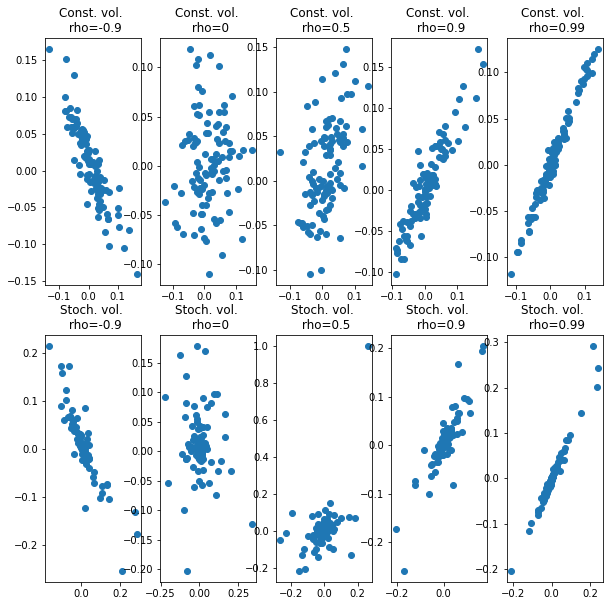

In [134]:
fig, axs = plt.subplots(2, 5, figsize=(10, 10))
for i in range(len(rho)):
  axs[0][i].scatter(R1_star[:, i], R2_star[:, i])
  axs[0][i].set_title(f'Const. vol. \n rho={rho[i]}')
  axs[1][i].scatter(R3_star[:, i], R4_star[:, i])
  axs[1][i].set_title(f'Stoch. vol. \n rho={rho[i]}')